REQUIREMENTS:
i. The excel file must be in the same folder with this jupyter notebook file.

ii. The excel file must be in the above form:

1st column: Timestamp
2nd column: OP
3rd column: PV
4th column: SP
5th column: MODE
Enter the name of the excel file (w/o .xlsx):does-not-exist-file
Enter the name of the excel file (w/o .xlsx):valve


/home/kaml/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



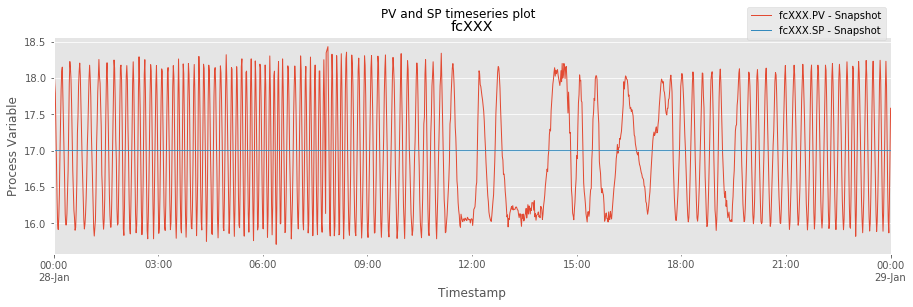

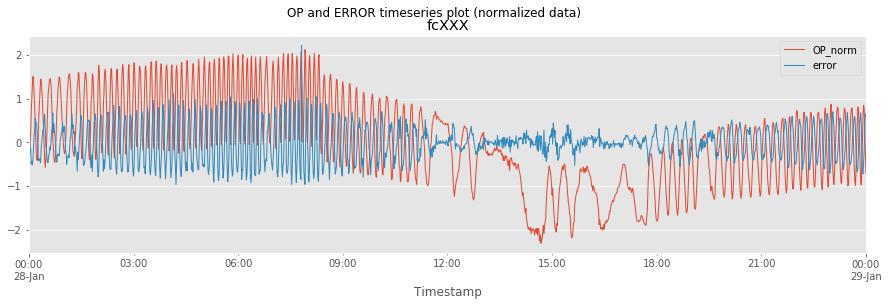

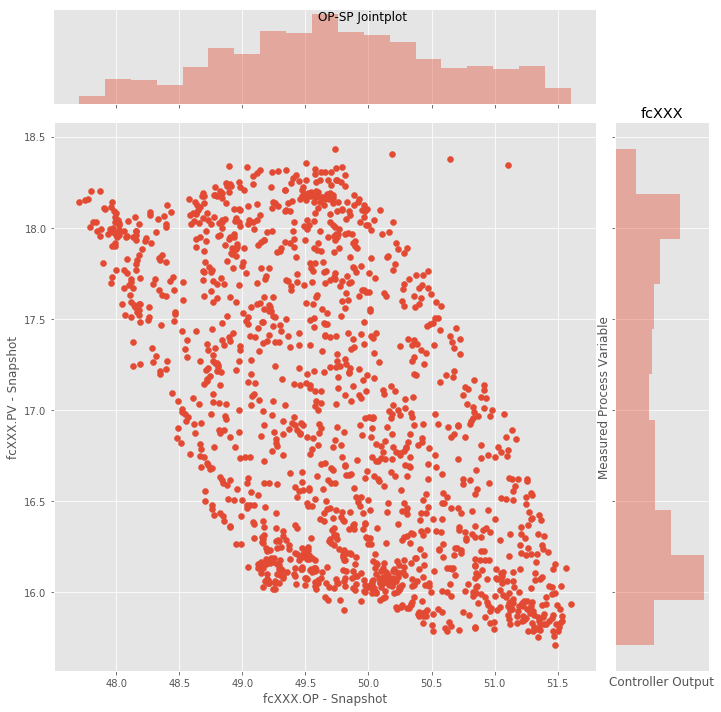

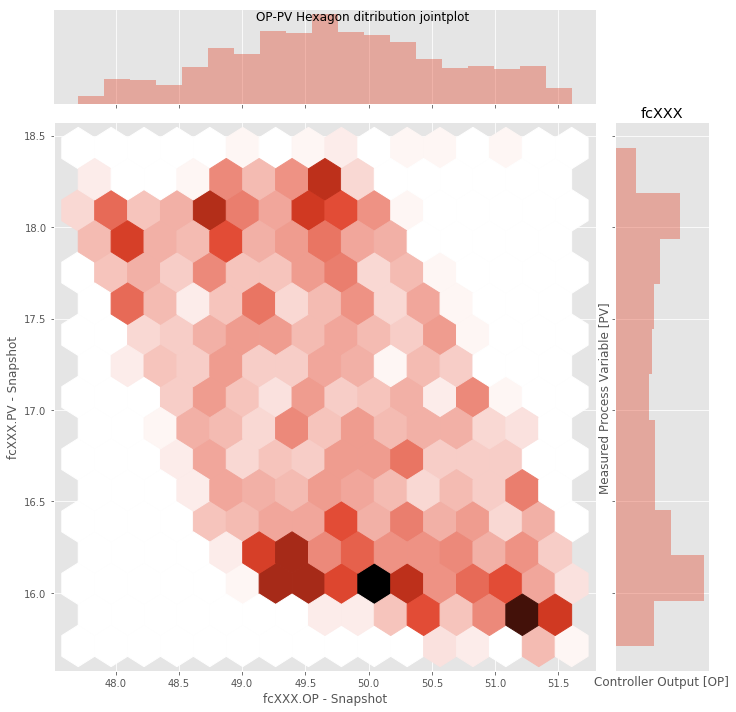

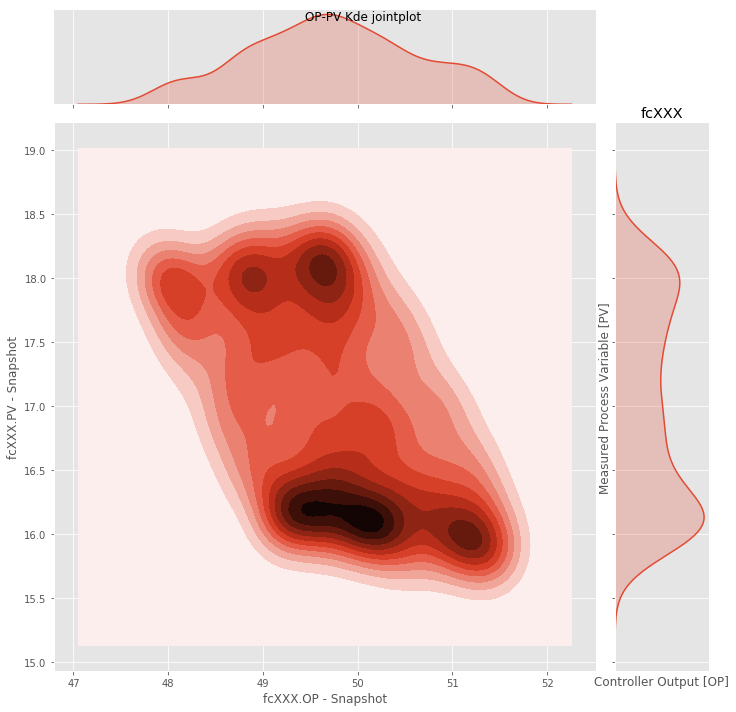

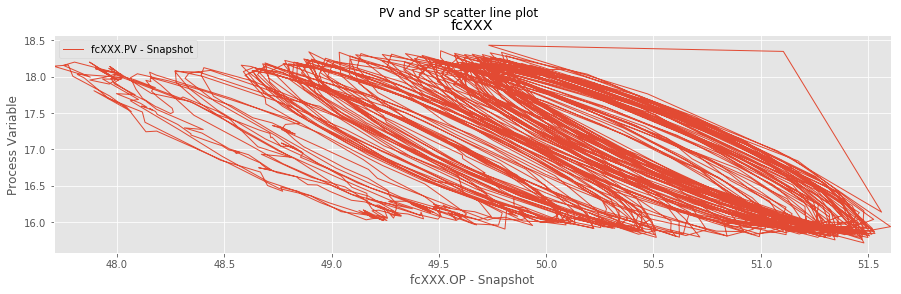

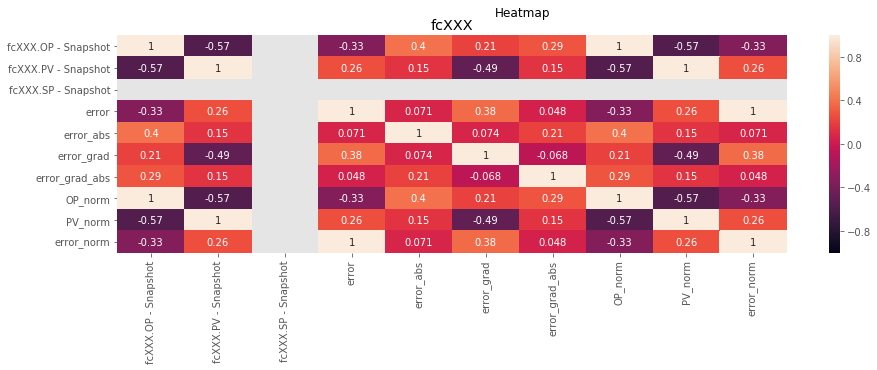

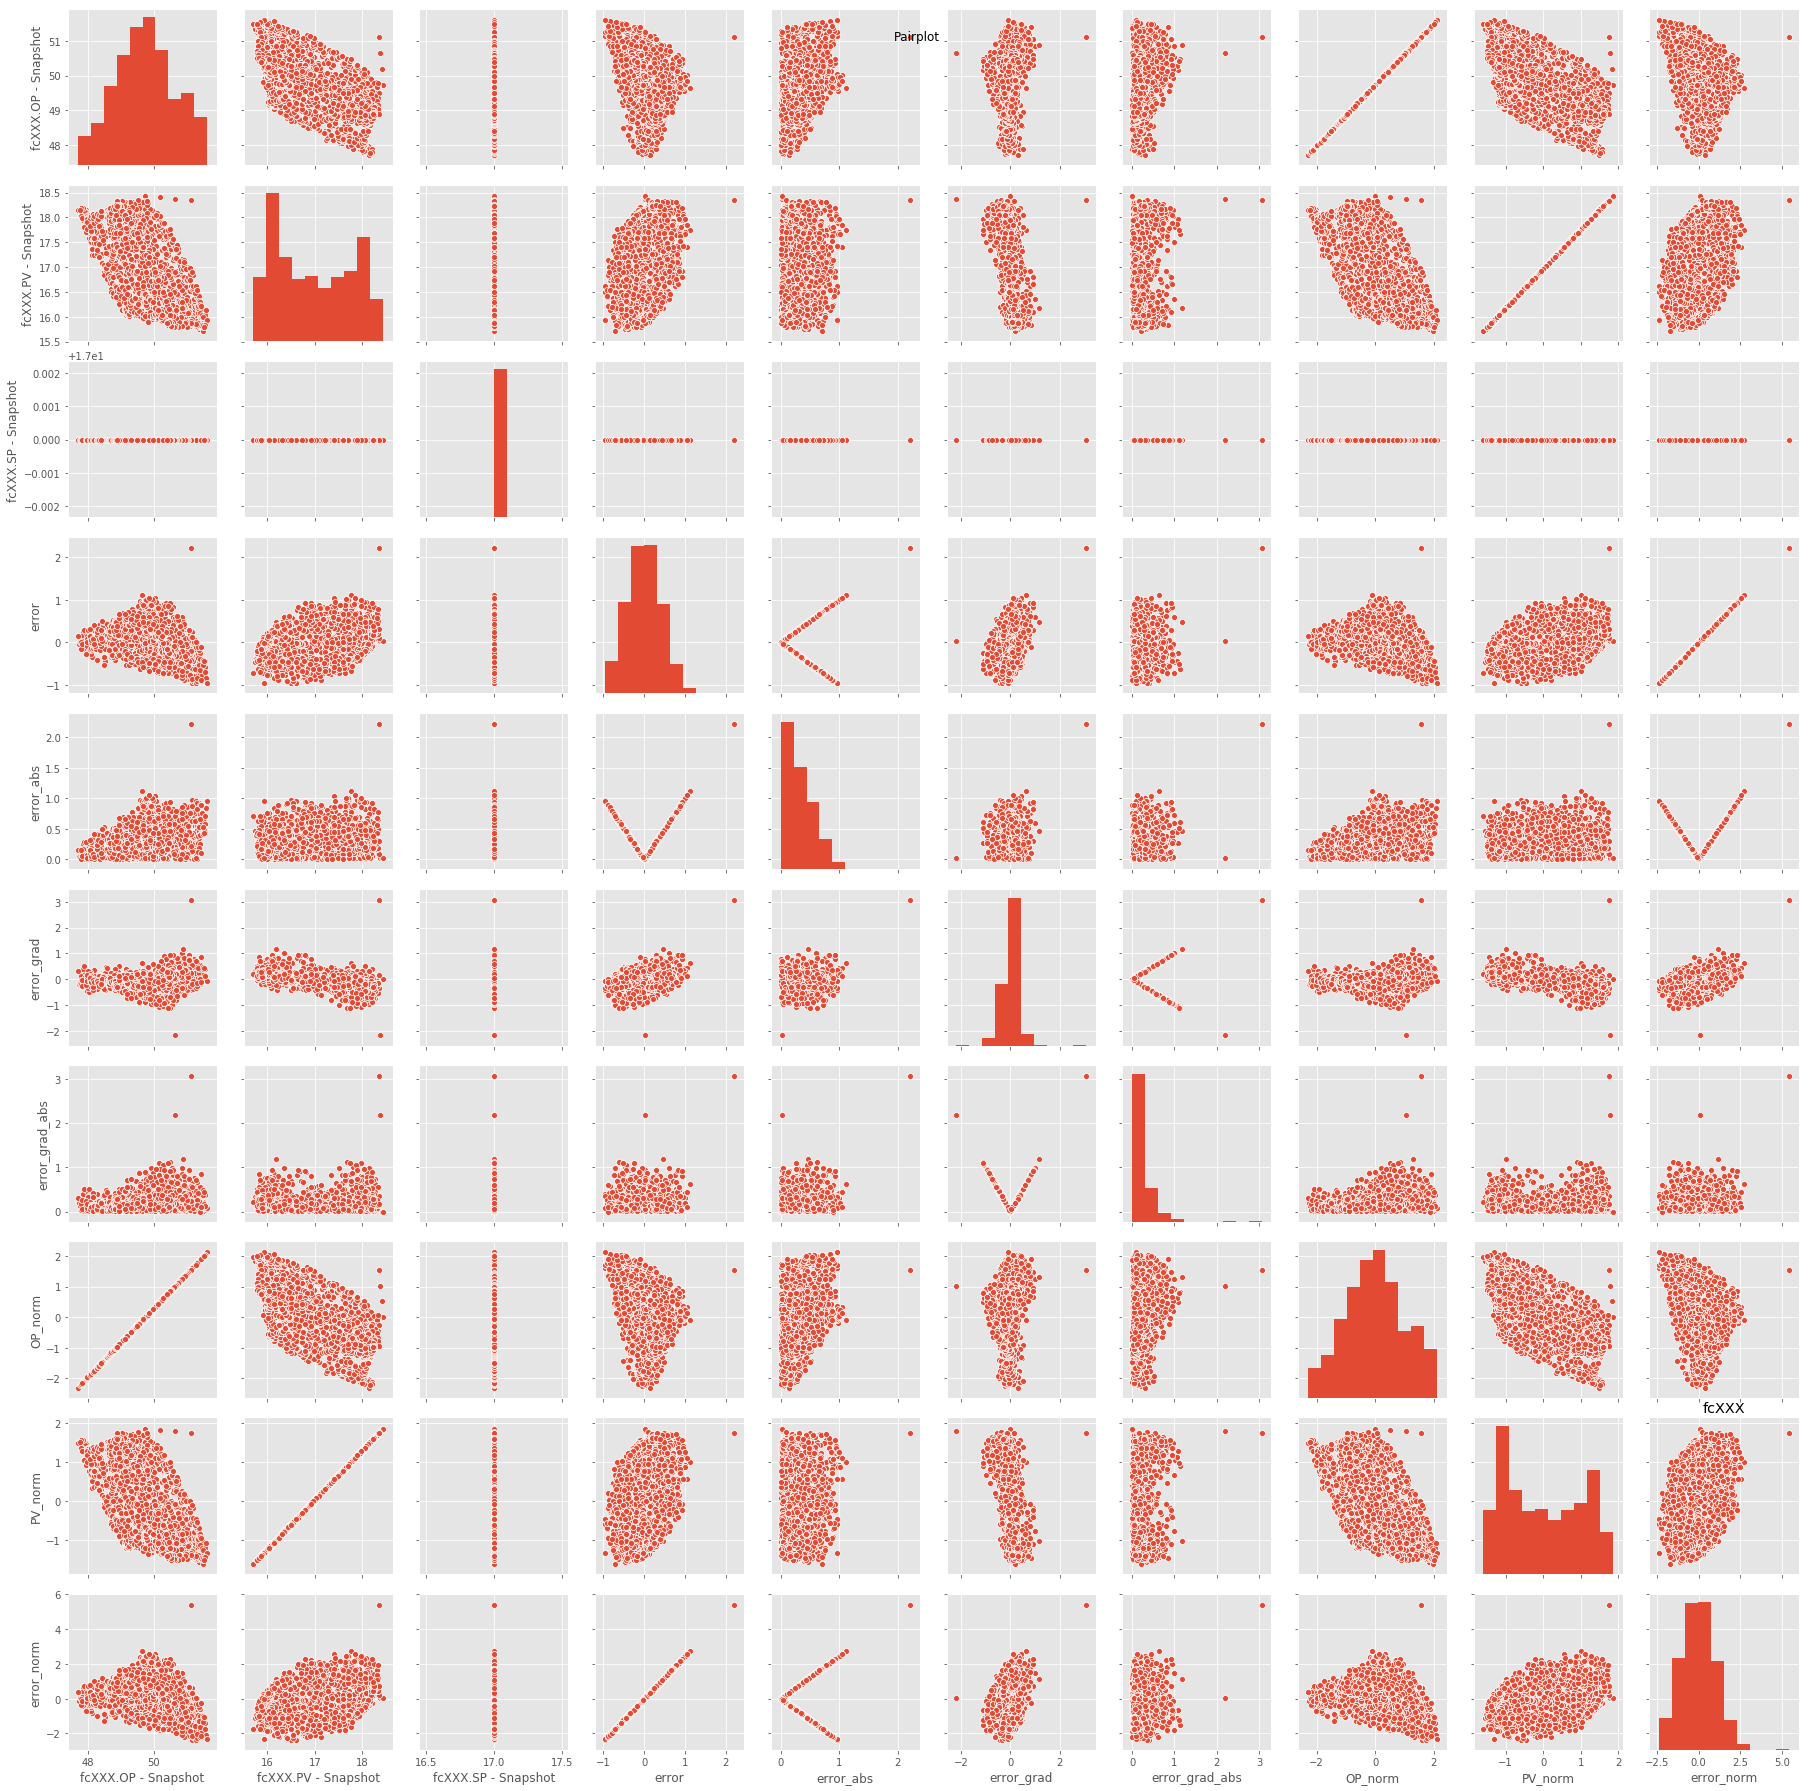

       fcXXX.OP - Snapshot  fcXXX.PV - Snapshot  fcXXX.SP - Snapshot  \
count          1441.000000          1441.000000               1441.0   
mean             49.736449            16.964666                 17.0   
std               0.881559             0.787306                  0.0   
min              47.705110            15.710640                 17.0   
25%              49.126490            16.201710                 17.0   
50%              49.723690            16.881580                 17.0   
75%              50.346100            17.711290                 17.0   
max              51.604520            18.431690                 17.0   

             error    error_abs   error_grad  error_grad_abs       OP_norm  \
count  1441.000000  1441.000000  1441.000000     1441.000000  1.441000e+03   
mean     -0.000276     0.324306     0.000340        0.211712  6.613955e-15   
std       0.408294     0.247905     0.307261        0.222613  1.000000e+00   
min      -0.963890     0.000000    -2.1

In [1]:
## IMPORTS and SETUP
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import os.path

## READ DATA FUNCTION
def open_excel_file():
    '''
    INPUT: None
    OUTPUT: Dataframe
    
    Checks for valid excel file and converts data to a DataFrame
    '''
    print("REQUIREMENTS:\ni. The excel file must be in the same folder with this jupyter notebook file.\n")
    print("ii. The excel file must be in the above form:\n")
    print("1st column: Timestamp\n2nd column: OP\n3rd column: PV\n4th column: SP\n5th column: MODE")
    while True:
        file = input(str("Enter the name of the excel file (w/o .xlsx):"))
        file = file + '.xlsx'
        if os.path.exists(file):
            df = pd.read_excel(file, usecols="A,B,C,D,E", skiprows=[0], index_col=0)
            break
    return(df)

## COMPUTE ERROR AND ERROR GRADIENT
def error_and_gradient(df):
    df['error'] = df[df.columns[1]] - df[df.columns[1]].shift(1)
    df['error_abs'] = np.abs(df['error'])
    df['error_grad'] = df['error'] - df['error'].shift(1)
    df['error_grad_abs'] = np.abs(df['error_grad'])
    #fill the empty cells of the error column with zeros
    df[df['error']==''] = np.nan
    df = df.fillna(value=0)
    return df

## DATA VISUALIZATIONS
def visualizations(df):
    col_list = list(df.columns)
    OP = col_list[0]
    PV = col_list[1]
    SP = col_list[2]
    MODE = col_list[3]
    sensor = OP.split('.')[0]
    
    #Normalize data [mean normalization]
    df['OP_norm'] = (df[OP]-df[OP].mean())/df[OP].std()
    df['PV_norm'] = (df[PV]-df[PV].mean())/df[PV].std()
    df['error_norm'] = (df['error']-df['error'].mean())/df['error'].std()
    
    plt.style.use('ggplot')
    
    ## TIMESERIES
    #PV and SP
    df.plot.line(y=[PV, SP],figsize=(15,4),lw=1)
    plt.suptitle('PV and SP timeseries plot')
    plt.title(sensor)
    plt.ylabel('Process Variable')
    plt.legend(bbox_to_anchor=(1, 1.16))
    plt.savefig('timeseries.png')
    plt.show()

    #OP and error
    df.plot.line(y=['OP_norm','error'],figsize=(15,4),lw=1)
    plt.suptitle('OP and ERROR timeseries plot (normalized data)')
    plt.title(sensor)
    plt.savefig('timeseries_error.png')
    plt.show()

    #jointplot
    sns.jointplot(x=OP, y=PV, data=df, height=10)
    plt.suptitle('OP-SP Jointplot')
    plt.title(sensor)
    plt.xlabel('Controller Output')
    plt.ylabel('Measured Process Variable')
    plt.savefig('jointplot.png')
    plt.show()

    #hexagon distribution representation [more points --> darker]
    sns.jointplot(x=OP, y=PV, data=df, kind='hex', height=10)
    plt.suptitle('OP-PV Hexagon ditribution jointplot')
    plt.title(sensor)
    plt.xlabel('Controller Output [OP]')
    plt.ylabel('Measured Process Variable [PV]')
    plt.savefig('jointplot_hex.png')
    plt.show()

    #kde --> shows the density of which thesse points match up the most
    sns.jointplot(x=OP, y=PV, data=df, kind='kde', height=10)
    plt.suptitle('OP-PV Kde jointplot')
    plt.title(sensor)
    plt.xlabel('Controller Output [OP]')
    plt.ylabel('Measured Process Variable [PV]')
    plt.savefig('jointplot_kde.png')
    plt.show()

    #scatter line plot (all data)
    df.plot.line(y=PV, x=OP ,figsize=(15,4),lw=1)
    plt.suptitle('PV and SP scatter line plot')
    plt.title(sensor)
    plt.ylabel('Process Variable')
    plt.savefig('scatter.png')
    plt.show()
    
    #heatmap
    plt.figure(figsize = (15,4))
    sns.heatmap(df.corr(), annot=True, vmin=-1);
    plt.suptitle('Heatmap')
    plt.title(sensor)
    plt.savefig('heatmap.png')
    plt.show()
    
    #pairplot
    sns.pairplot(df)
    plt.suptitle('Pairplot')
    plt.title(sensor)
    plt.savefig('pairplot.png')
    plt.show()

## CALL THE FUNCTIONS
if __name__ == '__main__':
    df = open_excel_file()
    df = error_and_gradient(df)
    visualizations(df)
    print(df.describe())